In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride city_path = os.path.join("city_data.csv")
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")


# Display the data table for preview
combined_data.head()

In [2]:
#Average Fare Per City
average_fare = combined_data.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})
average_fare.head()

,city,avg_fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [3]:
#Total Number of Rides Per City
total_rides = combined_data.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})
total_rides.head()

,city,total_rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [4]:
#Total Drivers
total_drivers = combined_data[["city", "driver_count"]].drop_duplicates("city")
total_drivers.head()

,city,driver_count
0,Richardfort,38
28,Williamsstad,59
51,Port Angela,67
70,Rodneyfort,34
93,West Robert,39


In [5]:
#City Type
city_type = combined_data[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")
final_df.head()

,city,avg_fare,total_rides,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

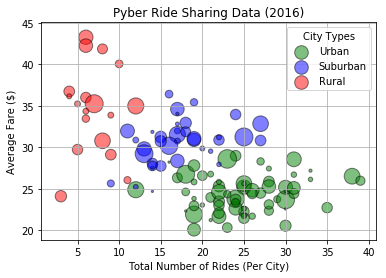

In [6]:
#Bubble Plot Data
urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']

#Bubble Plot
ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='green', s=final_df['driver_count']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='blue',s=final_df['driver_count']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='red', s=final_df['driver_count']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)

#Labels & Legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid(True)

#Save Image and Show
plt.savefig('Pyber_Ride_Share_Data.png')
plt.show()


## Total Fares by City Type

In [7]:
# Calculate Type Percents
#Percent of Total Fares by City Type
total_fares = combined_data["fare"].sum()
urban_fare = combined_data.loc[combined_data["type"] == "Urban", "fare"].sum()
rural_fare = combined_data.loc[combined_data["type"] == "Rural", "fare"].sum()
suburban_fare = combined_data.loc[combined_data["type"] == "Suburban", "fare"].sum()
urban_fare_p = round(urban_fare/total_fares, 2) *100
rural_fare_p = round(rural_fare/total_fares, 2) *100
suburban_fare_p = round(suburban_fare/total_fares, 2) *100

Text(0.5, 1.0, '% of Total Fares by City Type')

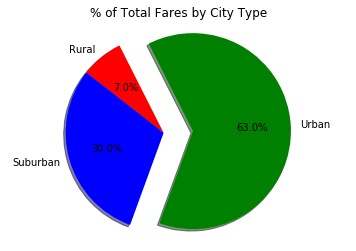

In [8]:
# Build Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0.3, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["green", "red", "blue"])
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  
plt.title("% of Total Fares by City Type")

In [9]:
# Save Figure
plt.savefig('Total_Fares_City_Type.png')

# Show Figure
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [10]:
# Calculate Ride Percents
final_total_rides = len(combined_data)
urban_rides = round(combined_data.loc[combined_data["type"] == "Urban", "ride_id"].count()/final_total_rides, 2) * 100
rural_rides = round(combined_data.loc[combined_data["type"] == "Rural", "ride_id"].count()/final_total_rides, 2) * 100
suburban_rides = round(combined_data.loc[combined_data["type"] == "Suburban", "ride_id"].count()/final_total_rides, 2) * 100



Text(0.5, 1.0, '% of Total Rides by City Type')

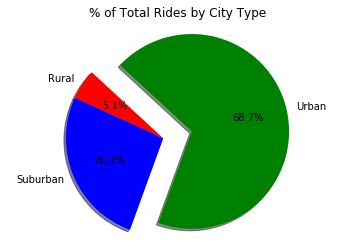

In [11]:
# Build Pie Chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides, rural_rides, suburban_rides]
explode = (0.3, 0, 0)  
                                         
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["green", "red", "blue"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Rides by City Type")

In [12]:
# Save Figure
plt.savefig('Total_Rides_City_Type.png')

# Show Figure
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents
final_total_drivers = final_df["driver_count"].sum()
urban_drivers = round(final_df.loc[final_df["type"] == "Urban", "driver_count"].sum()/final_total_drivers, 2)* 100
rural_drivers = round(final_df.loc[final_df["type"] == "Rural", "driver_count"].sum()/final_total_drivers, 2)* 100
suburban_drivers = round(final_df.loc[final_df["type"] == "Suburban", "driver_count"].sum()/final_total_drivers, 2)* 100

Text(0.5, 1.0, '% of Total Drivers by City Type')

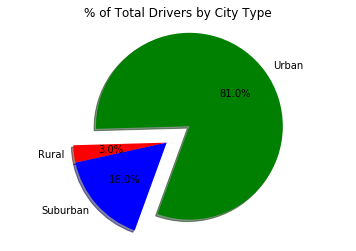

In [14]:
# Build Pie Charts
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.3, 0, 0) 
                                    
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["green", "red", "blue"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% of Total Drivers by City Type")

In [15]:
# Save Figure
plt.savefig('Total_Drivers_City_Type.png')
# Show Figure
plt.show()

<Figure size 432x288 with 0 Axes>

Analysis
1. Greatest Number of Total Rides, Fares, and Drivers are in Urban Areas
2. Lowest Number of Total Ride, Fares and Drivers are in Rural Areas
3. Urban Areas had the lowest average fare